In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

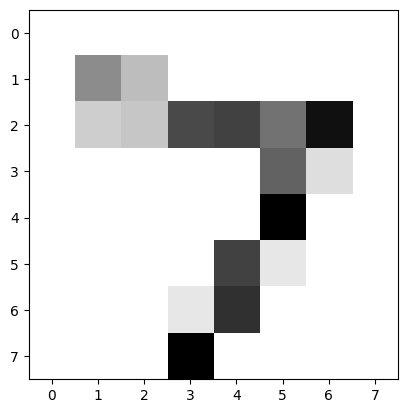

In [2]:
import MNIST_database as mnist

#Choose the final size of your image dataset
size_final = 8

data_zoom = mnist.MNISTData(size_initial=20, size_final=size_final, color_depth=5, flat=True)
test= data_zoom.x_test
train = data_zoom.x_train
ax = plt.subplot(1, 1 , 1)

#plt.imshow(test[0].reshape(size_final,size_final), cmap='gray_r')
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
plt.imshow(test[0].reshape(size_final,size_final), cmap='gray_r')


In [3]:
from tensorflow.keras.datasets import mnist as mnist
(_, y_train), (_, y_test) = mnist.load_data()


In [4]:
from fxpmath import Fxp
BIT_WIDTH = 8
is_signed = False

In [5]:
#lista contenente gli indici delle immagini campione nel Test Set del MNIST
#num_list[0] contiene l'indice dell'immagine di uno zero, num_list[1] di un uno e così via
#           0  1  2  3  4  5  6  7  8  9 
num_list = [3, 2, 1, 32,4, 15,21,0, 61,12]
for item in num_list:
    print(f"{str(item).ljust(4, ' ')}: {(Fxp(item, signed=is_signed, n_word=BIT_WIDTH, n_frac=0).bin())}")

3   : 00000011
2   : 00000010
1   : 00000001
32  : 00100000
4   : 00000100
15  : 00001111
21  : 00010101
0   : 00000000
61  : 00111101
12  : 00001100


## Find numbers from labels

Found 980 0s 
[3, 10, 13, 25, 28, 55, 69, 71, 101, 126, 136, 148, 157, 183, 188, 192, 194, 215, 246, 269, 271, 294, 296, 297, 305]


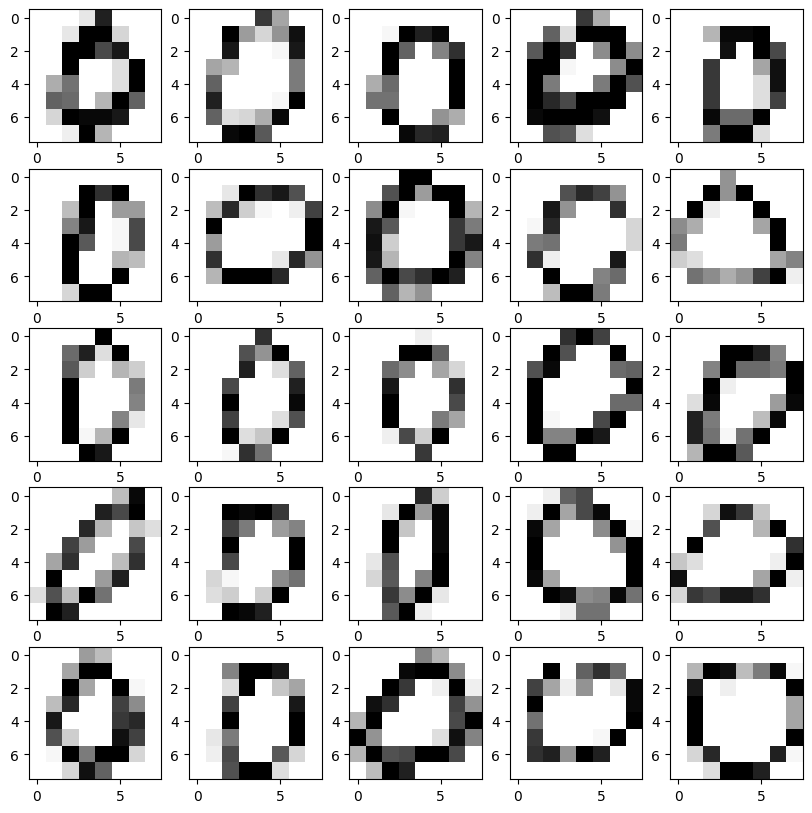

In [6]:
target_num = 0

indices = [i for i in range(len(test)) if y_test[i] == target_num]
print('Found', len(indices), str(target_num) + 's ')
print(indices[0:25])

fig = plt.figure(figsize=(10, 10))
j = 1
for i in indices[0:25]: 
    fig.add_subplot(5, 5, j)
    plt.imshow(test[i].reshape(size_final,size_final), cmap='gray_r')
    j+=1


## Generating file.txt with binary images from 0 to 10

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 104. 136.  40.
   0.   0.   0.   0. 248.   0.   0.  24. 120.   0.   0. 152.   0.   0.
   0. 192.   0.   0.   0. 144. 192. 120. 232. 200.   0.   0.   0.   0.
  16.  24.   0. 120.   0.   0.   0.   0.   0.   0.   0. 168.   0.   0.
   0.   0.   0.   0.   0.  80.   0.   0.]
len(img):64


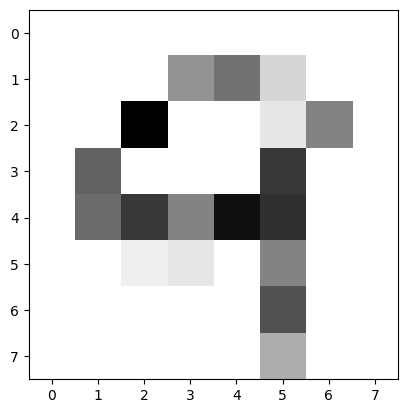

In [7]:
img = test[105]
img = img*(2**BIT_WIDTH)
print(img)
print(f"len(img):{len(img)}")
# print(img*(2**BIT_WIDTH))
plt.imshow(img.reshape(size_final,size_final), cmap='gray_r')


In [8]:
# print(f"img[{105}]:")
# k = 0
# for i in np.flip(test[105]):
#     #f.write('{:016b}'.format(int((bin(int(i*256))[2:]))))
#     # f.write('{:08b}'.format((int(i*(2**BIT_WIDTH)))))
#     # print('{:08b}'.format((int(i*256))))
#     # print(f"i: {i*(2**BIT_WIDTH)} ->"+'{:08b}'.format((int(i*(2**BIT_WIDTH)))))
#     print(f"i[{k}]: {str(i*(2**BIT_WIDTH)).ljust(6, ' ')} ->{(Fxp(i*(2**BIT_WIDTH), signed=is_signed, n_word=BIT_WIDTH, n_frac=0).bin())}")
#     # f.write(Fxp(i*(2**BIT_WIDTH), signed=is_signed, n_word=BIT_WIDTH, n_frac=0).bin())
#     # f.write(' ')
#     k += 1

In [9]:
# dir = os.path.join("dataset")
# if not os.path.exists(dir):
#     os.mkdir(dir)

# for target_num in range(0,10):
#     indices = [i for i in range(len(test)) if y_test[i] == target_num]
#     with open(f'dataset/TESTimg_{str(target_num)}_ap{BIT_WIDTH}.txt', 'w') as f:
#     #for num in enumerate(indices[0:100]):
#         for i in test[0:100]:
#             for j in i:

#             #f.write('{:04x}'.format((int(i*65536))))
#                 f.write(str(j))
#                 f.write('\t')
#                 # print(j)
#             #print(i*65536, '\n')
#             f.write('\n')


In [10]:
# 2**BIT_WIDTH

In [11]:
#lista contenente gli indici delle immagini campione nel Test Set del MNIST
#num_list[0] contiene l'indice dell'immagine di uno zero, num_list[1] di un uno e così via

n_image_test = 100

#           0  1  2  3  4  5  6  7  8  9          
num_list = [3, 2, 1, 32,4, 15,21,0, 61,12] + [x for x in range(62,62 + n_image_test - 10)]

#num_list = [3]
with open(f'dataset/TESTimg_downto_apfixed{BIT_WIDTH}_100.txt', 'w') as f:
    for index , num in enumerate(num_list):
        #f.write('signal address_' + str(index) + ' : std_logic_vector((size-1) downto 0) := \n')
        print(f"img[{num}]:")
        k = 0
        for i in np.flip(test[num]):
            # #f.write('{:016b}'.format(int((bin(int(i*256))[2:]))))
            # # f.write('{:08b}'.format((int(i*(2**BIT_WIDTH)))))
            # # print('{:08b}'.format((int(i*256))))
            # # print(f"i: {i*(2**BIT_WIDTH)} ->"+'{:08b}'.format((int(i*(2**BIT_WIDTH)))))
            
            # print(f"i[{k}]: {str(i*(2**BIT_WIDTH)).ljust(6, ' ')} ->{(Fxp(i*(2**BIT_WIDTH), signed=is_signed, n_word=BIT_WIDTH, n_frac=0).bin())}")

            # # f.write(' ')
            f.write(Fxp(i*(2**BIT_WIDTH), signed=is_signed, n_word=BIT_WIDTH, n_frac=0).bin())
            
            k += 1
            
        # print('----')
        f.write('\n')

img[3]:
img[2]:
img[1]:
img[32]:
img[4]:
img[15]:
img[21]:
img[0]:
img[61]:
img[12]:
img[62]:
img[63]:
img[64]:
img[65]:
img[66]:
img[67]:
img[68]:
img[69]:
img[70]:
img[71]:
img[72]:
img[73]:
img[74]:
img[75]:
img[76]:
img[77]:
img[78]:
img[79]:
img[80]:
img[81]:
img[82]:
img[83]:
img[84]:
img[85]:
img[86]:
img[87]:
img[88]:
img[89]:
img[90]:
img[91]:
img[92]:
img[93]:
img[94]:
img[95]:
img[96]:
img[97]:
img[98]:
img[99]:
img[100]:
img[101]:
img[102]:
img[103]:
img[104]:
img[105]:
img[106]:
img[107]:
img[108]:
img[109]:
img[110]:
img[111]:
img[112]:
img[113]:
img[114]:
img[115]:
img[116]:
img[117]:
img[118]:
img[119]:
img[120]:
img[121]:
img[122]:
img[123]:
img[124]:
img[125]:
img[126]:
img[127]:
img[128]:
img[129]:
img[130]:
img[131]:
img[132]:
img[133]:
img[134]:
img[135]:
img[136]:
img[137]:
img[138]:
img[139]:
img[140]:
img[141]:
img[142]:
img[143]:
img[144]:
img[145]:
img[146]:
img[147]:
img[148]:
img[149]:
img[150]:
img[151]:


In [12]:
# #salvataggio dei true label associati alle immagini inserite nella FPGA
# with open('dataset/TESTlabels_downto_apint6_100imgs.txt', 'w') as f:
#     for index , num in enumerate(num_list):
#         f.write('signal label_' + str(index) + ' : std_logic_vector(3 downto 0) :=  ')
#         f.write('{:04d}'.format(int((bin(y_test_int[num])[2:]))))
#         f.write('\n')